In [73]:
import tensorflow as tf
from tensorflow import keras
import itertools
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [74]:
train_path = "C:/Users/mohit/Image Processing/Sign-Language-Digits/train"
test_path = "C:/Users/mohit/Image Processing/Sign-Language-Digits/test"
valid_path = "C:/Users/mohit/Image Processing/Sign-Language-Digits/valid"

In [75]:
#Preprocessing

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)

Found 1712 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [76]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [77]:
model1 = Sequential([
  data_augmentation,
  layers.Conv2D(16, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [78]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)       

In [79]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [80]:
hist1 = model1.fit(train_batches, validation_data=valid_batches, shuffle=True, batch_size=5 , epochs=50)

Epoch 1/50
172/172 [==============================] - 9s 42ms/step - loss: 4.4786 - accuracy: 0.2249 - val_loss: 1.4970 - val_accuracy: 0.4833
Epoch 2/50
172/172 [==============================] - 6s 36ms/step - loss: 1.6898 - accuracy: 0.4428 - val_loss: 1.2348 - val_accuracy: 0.5733
Epoch 3/50
172/172 [==============================] - 6s 35ms/step - loss: 1.3371 - accuracy: 0.5485 - val_loss: 1.0950 - val_accuracy: 0.6200
Epoch 4/50
172/172 [==============================] - 6s 36ms/step - loss: 1.1626 - accuracy: 0.6040 - val_loss: 0.9932 - val_accuracy: 0.6467
Epoch 5/50
172/172 [==============================] - 6s 36ms/step - loss: 1.0172 - accuracy: 0.6595 - val_loss: 0.8652 - val_accuracy: 0.7167
Epoch 6/50
172/172 [==============================] - 6s 35ms/step - loss: 0.8862 - accuracy: 0.7114 - val_loss: 0.7025 - val_accuracy: 0.7533
Epoch 7/50
172/172 [==============================] - 6s 35ms/step - loss: 0.7657 - accuracy: 0.7611 - val_loss: 0.7469 - val_accuracy: 0.7467

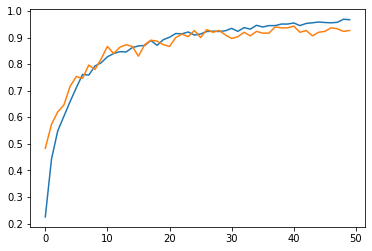

In [81]:
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["val_accuracy"])

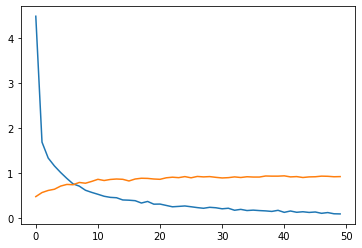

In [82]:
plt.plot(hist1.history["loss"])
plt.plot(hist1.history["val_accuracy"])

In [83]:
pred = model1.predict(test_batches)
y_classes = [np.argmax(i) for i in pred]
y_classes[:10]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [85]:
test_batches.class_indices

{'A0': 0,
 'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'A6': 6,
 'A7': 7,
 'A8': 8,
 'A9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 1 0 0]
 [0 0 0 1 4 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 1 0 0 0 0 3 1 0]
 [0 0 0 0 0 0 0 1 4 0]
 [0 0 0 0 0 0 0 0 0 5]]


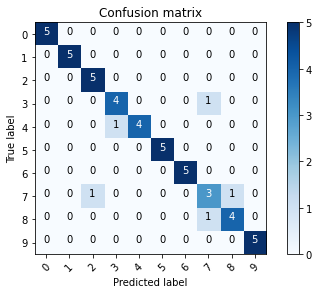

In [86]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(pred, axis=1))
plot_confusion_matrix(cm=cm, classes=[0,1,2,3,4,5,6,7,8,9])

# VGG16 Model

In [98]:
#vgg16_model = tf.keras.applications.vgg16.VGG16()

In [88]:
model2 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model2.add(layer)
    
for layer in model2.layers:
    layer.trainable = False
    
model2.add(Dense(units=10, activation="softmax"))

In [89]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [90]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [91]:
hist2 = model2.fit(x=train_batches, validation_data=valid_batches, shuffle=True, batch_size=5 , epochs=29)

Epoch 1/29
172/172 [==============================] - 25s 141ms/step - loss: 1.5888 - accuracy: 0.4720 - val_loss: 1.0388 - val_accuracy: 0.6600
Epoch 2/29
172/172 [==============================] - 24s 139ms/step - loss: 0.7957 - accuracy: 0.7617 - val_loss: 0.7202 - val_accuracy: 0.7700
Epoch 3/29
172/172 [==============================] - 24s 137ms/step - loss: 0.5752 - accuracy: 0.8411 - val_loss: 0.6078 - val_accuracy: 0.8067
Epoch 4/29
172/172 [==============================] - 25s 143ms/step - loss: 0.4640 - accuracy: 0.8808 - val_loss: 0.4972 - val_accuracy: 0.8433
Epoch 5/29
172/172 [==============================] - 24s 137ms/step - loss: 0.3916 - accuracy: 0.8919 - val_loss: 0.4453 - val_accuracy: 0.8667
Epoch 6/29
172/172 [==============================] - 25s 146ms/step - loss: 0.3366 - accuracy: 0.9223 - val_loss: 0.4058 - val_accuracy: 0.8833
Epoch 7/29
172/172 [==============================] - 25s 146ms/step - loss: 0.2963 - accuracy: 0.9352 - val_loss: 0.3696 - val_ac

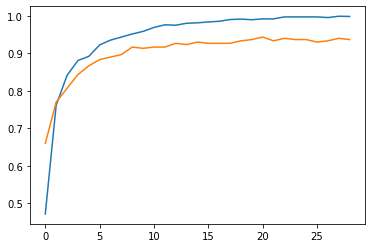

In [99]:
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["val_accuracy"])

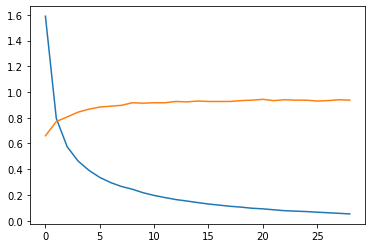

In [100]:
plt.plot(hist2.history["loss"])
plt.plot(hist2.history["val_accuracy"])

In [101]:
pred = model2.predict(test_batches)
y_classes = [np.argmax(i) for i in pred]
y_classes[:10]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 4 0 1 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 2 3 0]
 [0 0 0 0 0 0 0 0 1 4]]


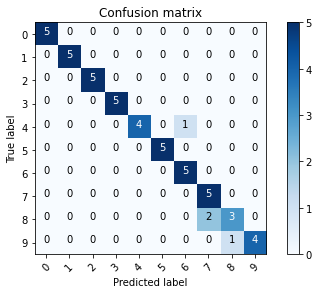

In [102]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=y_classes)
plot_confusion_matrix(cm=cm, classes=[0,1,2,3,4,5,6,7,8,9])

In [117]:
def predict(image):
    img = cv2.imread(image)
    plt.imshow(img)
    plt.show()
    #resize = tf.image.resize(img, (50,50))
    resize = cv2.resize(img, (224,224))
    #print(np.expand_dims(resize,0).shape)
    pred = model1.predict(np.expand_dims(resize/255,0))
    print(pred)
    y_classes = np.argmax(pred)
    print(y_classes)

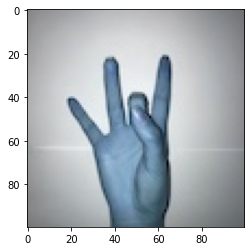

[[0.10364801 0.0992403  0.09856752 0.10445441 0.09378754 0.09973004
  0.09381947 0.09792349 0.10767888 0.10115027]]
8


In [121]:
predict("C:/Users/mohit/Image Processing/Sign-Language-Digits/valid/A8/IMG_4824.jpg")